In [24]:
import random
import numpy
from numpy import linspace
import matplotlib.pyplot as plt


def ErdosRenyi(n,p):
    adj = [[] for x in range(n)]
    vertices = [i for i in range(n)]
    edges = [(i,j) for i in range(n) for j in range(i) if random.random() < p]
    
    for (i,j) in edges:
        adj[i].append(vertices[j])
        adj[j].append(vertices[i])
    return adj


def Component(edge, visited,adj):
    for v in edge:
        if v not in visited:
            visited.add(v)
            Component(adj[v], visited,adj)


def connectedComponents(adj):
    components = []
    cumulativeVisited = set()

    for v in range(len(adj)):
        if v not in cumulativeVisited:
            componentVisited = set([v])
            Component(adj[v], componentVisited,adj)

            components.append(componentVisited)
            cumulativeVisited |= componentVisited

    assert sum(len(c) for c in components) == len(adj)
    return components


def sizeOfLargestComponent(adj):
    return max(len(c) for c in connectedComponents(adj))

def sizeOfComponent(adj):
    new_list = set(len(c) for c in connectedComponents(adj)) 
    new_list.remove(max(new_list)) 
    x = max(new_list) if new_list else 0
    return x

def sizeOfIsolatedNode(adj):
    s = 0
    for i in range(len(adj)):
        if(len(adj[i])== 0 ):
            s += 1
    return s


In [51]:
randomGraph(10,0.3)

[[2, 5, 6],
 [4, 9],
 [0, 3],
 [2, 8],
 [1, 6, 8],
 [0, 6],
 [0, 4, 5, 9],
 [8],
 [3, 4, 7, 9],
 [1, 6, 8]]

In [11]:
#A
def Q1A(n,p):
    edge = 0
    G = ErdosRenyi(n,p)
    for i in range(n):
        edge = edge + len(G[i])
    return edge/2

su = 0
for i in range(30):
    su = su + Q1A(10000,0.2)
mean = su/30
print(mean)
print(10000*9999*0.2/2)

9998674.7
9999000.0


In [12]:
#B--------> p<1/n
def Q1B(n,p):
    G = ErdosRenyi(n,p)
    return sizeOfLargestComponent(G)

su = 0
for i in range(30):
    su = su + Q1B(1000,0.0001)
mean = su/30
print(mean)
# print(math.log)

3.3333333333333335


In [4]:
#C-------->p=1/n
def Q1C(n,p):
    G = ErdosRenyi(n,p)
    return sizeOfLargestComponent(G)

su = 0
for i in range(30):
    su = su + Q1C(1000,0.001)
mean = su/30
print(mean)

82.16666666666667


In [25]:
#D-------->p>1/n
def Q1D(n,p):
    G = ErdosRenyi(n,p)
    return sizeOfLargestComponent(G),sizeOfComponent(G)

su = 0
su2 = 0
for i in range(30):
    c1,c2=Q1D(1000,0.01)
    su = su + c1
    su2 = su2 + c2
mean = su/30
mean2 = su2/30
print('giant component:',mean,'second component:',mean2)

giant component: 999.9 second component: 0.1


In [88]:
#E-------->p<ln(n)/n
def Q1E(n,p):
    G = ErdosRenyi(n,p)
    return sizeOfIsolatedNode(G)

su = 0
#ln(n)/n = 0.006
for i in range(30):
    su = su + Q1E(1000,0.0006)
mean = su/30
print(mean)

549.8


In [91]:
#F-------->p>ln(n)/n
def Q1F(n,p):
    G = ErdosRenyi(n,p)
    return sizeOfIsolatedNode(G)

su = 0
#ln(n)/n = 0.006
for i in range(30):
    su = su + Q1F(1000,0.007)
mean = su/30
print(mean)

0.8333333333333334


In [26]:
from collections import defaultdict 
  
#Class to represent a graph 
class Graph: 
    def minDistance(self,dist,queue): 
        # Initialize min value and min_index as -1 
        minimum = float("Inf") 
        min_index = -1
        for i in range(len(dist)): 
            if dist[i] < minimum and i in queue: 
                minimum = dist[i] 
                min_index = i 
        return min_index 

    def dijkstra(self, graph, src): 
  
        row = len(graph) 
        col = len(graph[0]) 
  
        # The output array. dist[i] will hold 
        # the shortest distance from src to i 
        # Initialize all distances as INFINITE  
        dist = [float("Inf")] * row 
  
        #Parent array to store  
        # shortest path tree 
        parent = [-1] * row 
  
        # Distance of source vertex  
        # from itself is always 0 
        dist[src] = 0
      
        # Add all vertices in queue 
        queue = [] 
        for i in range(row): 
            queue.append(i) 
              
        #Find shortest path for all vertices 
        while queue: 
  
            # Pick the minimum dist vertex  
            # from the set of vertices 
            # still in queue 
            u = self.minDistance(dist,queue)  
  
            # remove min element 
#             res = any(u in i for i in queue)
#             if(res):
            queue.remove(u) 
  
            # Update dist value and parent  
            # index of the adjacent vertices of 
            # the picked vertex. Consider only  
            # those vertices which are still in 
            # queue 
            for i in range(col): 
                '''Update dist[i] only if it is in queue, there is 
                an edge from u to i, and total weight of path from 
                src to i through u is smaller than current value of 
                dist[i]'''
                if graph[u][i] and i in queue: 
                    if dist[u] + graph[u][i] < dist[i]: 
                        dist[i] = dist[u] + graph[u][i] 
                        parent[i] = u 
  
  
        # print the constructed distance array 
#         return self.printSolution(dist,parent)/(len(graph)-1)
        return dist

average_shortest_path_length: 2.254600000000001
average_shortest_path_length: 2.556250000000001
average_shortest_path_length: 2.743822222222222
average_shortest_path_length: 2.8117
average_shortest_path_length: 2.954024
[100, 200, 300, 400, 500]
[2.254600000000001, 2.556250000000001, 2.743822222222222, 2.8117, 2.954024]


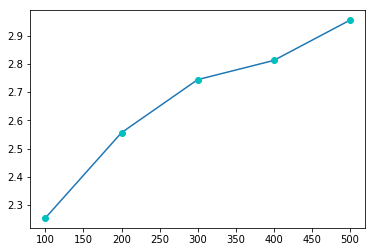

In [33]:
#G
import pylab
def Q1G(n,p):
    g=Graph()
    G= ErdosRenyi(n,p)
    graph = [[0]*len(G) for x in range(len(G))]
    for i in range(len(G)):
        for j in range(len(G[i])):
            graph[i][G[i][j]] = 1
    sumi = 0
    for i in range(len(G)):
        dist = g.dijkstra(graph,i) 
        sumii = 0
        for j in range(len(dist)):
                sumii = sumii + dist[j]
        sumi = sumi+(sumii/len(dist))
    print('average_shortest_path_length:',sumi/len(G))
    return sumi/len(G)
    
x=[100,200,300,400,500]
y=[]
for i in x:
    y.append(Q1G(i,10/i))
print(x)
print(y)
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.show()